In [1]:

%pip install gpxpy

                                              0.0/42.6 kB ? eta -:--:--
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Libraries 

In [2]:

import gpxpy.gpx
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

Import GPX file

In [4]:
with open('ride-0-2024-05-01-11-44-30.gpx', 'r', encoding='utf-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)
gpx

GPX(tracks=[GPXTrack(name='Outdoor Cycling', segments=[GPXTrackSegment(points=[...])])])

In [9]:
dir(gpx)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 'add_elevation',
 'add_missing_data',
 'add_missing_elevations',
 'add_missing_speeds',
 'add_missing_times',
 'adjust_time',
 'author_email',
 'author_link',
 'author_link_text',
 'author_link_type',
 'author_name',
 'bounds',
 'clone',
 'copyright_author',
 'copyright_license',
 'copyright_year',
 'creator',
 'description',
 'extensions',
 'fill_time_data_with_regular_intervals',
 'get_bounds',
 'get_duration',
 'get_elevation_extremes',
 'get_location_at',
 'get_moving_data',
 'get_nearest_location',
 'get_nearest_locations',
 'get_points_data',
 'get_points_no',
 'get_time_bounds',
 'get_track_points_no',
 'get_uphi

In [21]:
with open('Zepp20240427144544.gpx', 'r', encoding='utf-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)
gpx

GPX(tracks=[GPXTrack(name='20240427144544 Outdoor cycling', segments=[GPXTrackSegment(points=[...])])])

In [8]:
gpx.get_track_points_no()  #Extract the number of data points
#Number of track points, *without* route and waypoints

894

In [9]:
gpx.get_elevation_extremes()  #Get altitud range

MinimumMaximum(minimum=0.0, maximum=2751.4)

In [10]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=2941.320000000001, downhill=222.92000000000098)

In [11]:
len(gpx.tracks)

1

In [11]:
gpx.add_missing_speeds?

In [12]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(4.564596712589264, -74.09516489133239, elevation=0.0, time=datetime.datetime(2024, 5, 1, 11, 51, 43, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.564671227708459, -74.09510672092438, elevation=0.0, time=datetime.datetime(2024, 5, 1, 11, 51, 45, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.56495470367372, -74.09487362019718, elevation=0.0, time=datetime.datetime(2024, 5, 1, 11, 51, 53, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.565367009490728, -74.09451931715012, elevation=0.0, time=datetime.datetime(2024, 5, 1, 11, 52, 9, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.56602331250906, -74.09405051730573, elevation=0.0, time=datetime.datetime(2024, 5, 1, 11, 52, 26, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.5663942117244005, -74.09389251843095, elevation=2644.6, time=datetime.datetime(2024, 5, 1, 11, 52, 37, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4.566769218072295, -74.09381808713078, elevation=2641.8, time=datetime.datetime(2024, 5, 1, 11, 52, 53, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(4

In [10]:
gpx.get_time_bounds()

TimeBounds(start_time=datetime.datetime(2024, 5, 1, 11, 51, 43, tzinfo=SimpleTZ('Z')), end_time=datetime.datetime(2024, 5, 1, 13, 57, 12, tzinfo=SimpleTZ('Z')))

In [12]:
moving_data = gpx.get_moving_data(raw=True)
moving_data  #Max speed in meters per second

MovingData(moving_time=6883.0, stopped_time=646.0, moving_distance=35086.208797334795, stopped_distance=54.296344446324056, max_speed=13.65791007428893)

Transform the `GPX` data to a `list`

In [13]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [28]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for i, point in enumerate(segment.points):
            if i > 0:
                prev_point = segment.points[i - 1]
                time_diff = point.time - prev_point.time
                if time_diff.total_seconds() > 0:
                    distance = point.distance_3d(prev_point)
                    speed = distance / time_diff.total_seconds()
                else:
                    speed = 0
            else:
                speed = 0

            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation,
                'speed': speed
            })

In [43]:
route_info = []

if gpx.tracks:
    for track in gpx.tracks:
        if track.segments:
            for segment in track.segments:
                if segment.points:
                    for i, point in enumerate(segment.points):
                        if i > 0:
                            prev_point = segment.points[i - 1]
                            time_diff = point.time - prev_point.time
                            if time_diff.total_seconds() > 0:
                                distance = point.distance_3d(prev_point)
                                speed = distance / time_diff.total_seconds()
                            else:
                                speed = 0
                        else:
                            speed = 0

                        route_info.append({
                            'latitude': point.latitude,
                            'longitude': point.longitude,
                            'elevation': point.elevation,
                            'speed': speed
                        })
                else:
                    print("Segment has no points.")
        else:
            print("Track has no segments.")
else:
    print("No tracks found in GPX file.")


In [44]:
route_info[:3]

[{'latitude': 4.564596712589264,
  'longitude': -74.09516489133239,
  'elevation': 0.0,
  'speed': 0},
 {'latitude': 4.564671227708459,
  'longitude': -74.09510672092438,
  'elevation': 0.0,
  'speed': 5.255313915262971},
 {'latitude': 4.56495470367372,
  'longitude': -74.09487362019718,
  'elevation': 0.0,
  'speed': 5.100358224066149}]

Transform the `list` to a Pandas `DataFrame`

In [45]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation,speed
0,4.564597,-74.095165,0.0,0.000000
1,4.564671,-74.095107,0.0,5.255314
2,4.564955,-74.094874,0.0,5.100358
3,4.565367,-74.094519,0.0,3.777152
4,4.566023,-74.094051,0.0,5.275733


In [46]:
route_df.to_csv('route_df.csv', index=False)

# Data Visualization 

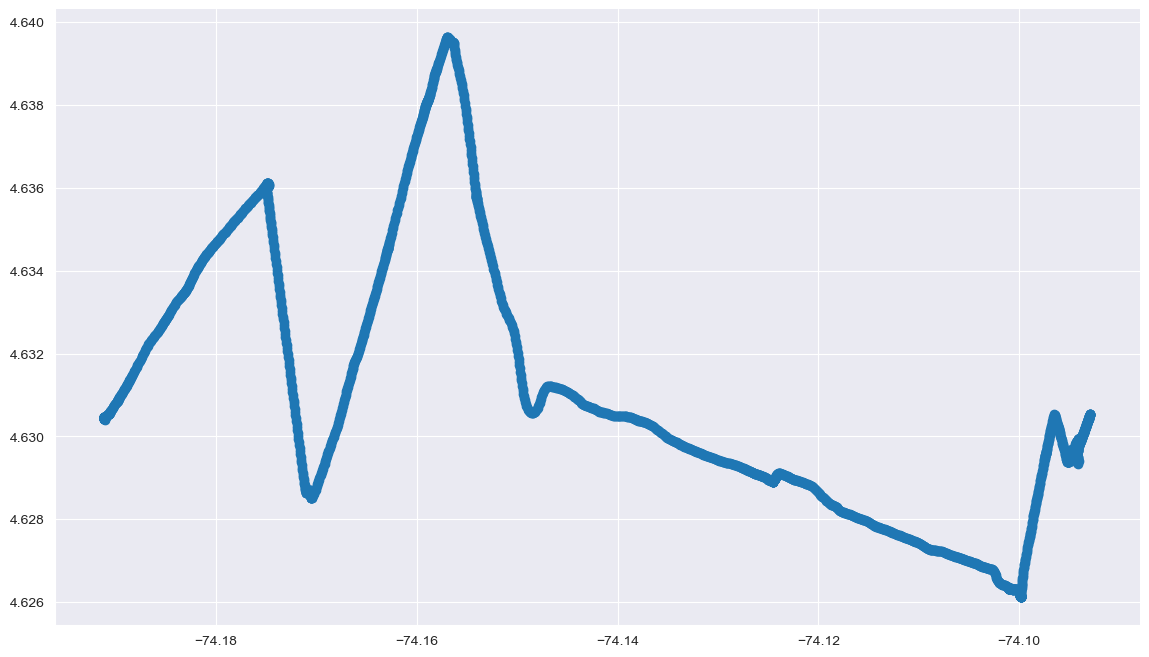

In [24]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'])

In [25]:
import plotly.graph_objs as go

# Assuming you have 'route_df' DataFrame with 'longitude' and 'latitude' columns

# Create a scatter plot
trace = go.Scatter(
    x=route_df['longitude'],
    y=route_df['latitude'],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',  # You can specify any color you want
        opacity=0.7
    )
)

# Define layout
layout = go.Layout(
    title='Route Scatter Plot',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig

# Visualize GPX route file with Folium

In [3]:
import folium

In [4]:
route_df = pd.read_csv('route_df.csv')
route_df.head()

,latitude,longitude,elevation,speed
0,4.564597,-74.095165,0.0,0.000000
1,4.564671,-74.095107,0.0,5.255314
2,4.564955,-74.094874,0.0,5.100358
3,4.565367,-74.094519,0.0,3.777152
4,4.566023,-74.094051,0.0,5.275733


In [7]:
route_df.speed.describe()

count    894.000000
mean       7.205484
std        8.383875
min        0.000000
25%        4.421126
50%        7.724232
75%        9.401051
max      240.452763
Name: speed, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x253defddfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d63ff550>,
 'boxes': [<matplotlib.lines.Line2D at 0x253dd18b050>],
 'medians': [<matplotlib.lines.Line2D at 0x253deff0590>],
 'fliers': [<matplotlib.lines.Line2D at 0x253deff0c90>],
 'means': []}

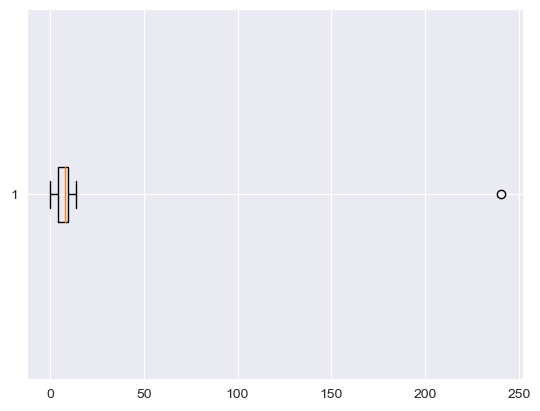

In [8]:
plt.boxplot(route_df.speed, vert=False)

In [5]:
route_df = route_df.loc[route_df.speed < 28]

In [6]:
route_df.speed.describe()

count    893.000000
mean       6.944289
std        3.050984
min        0.000000
25%        4.420668
50%        7.719257
75%        9.396040
max       13.657910
Name: speed, dtype: float64

## Plain scatter plot, non-specialized library for this

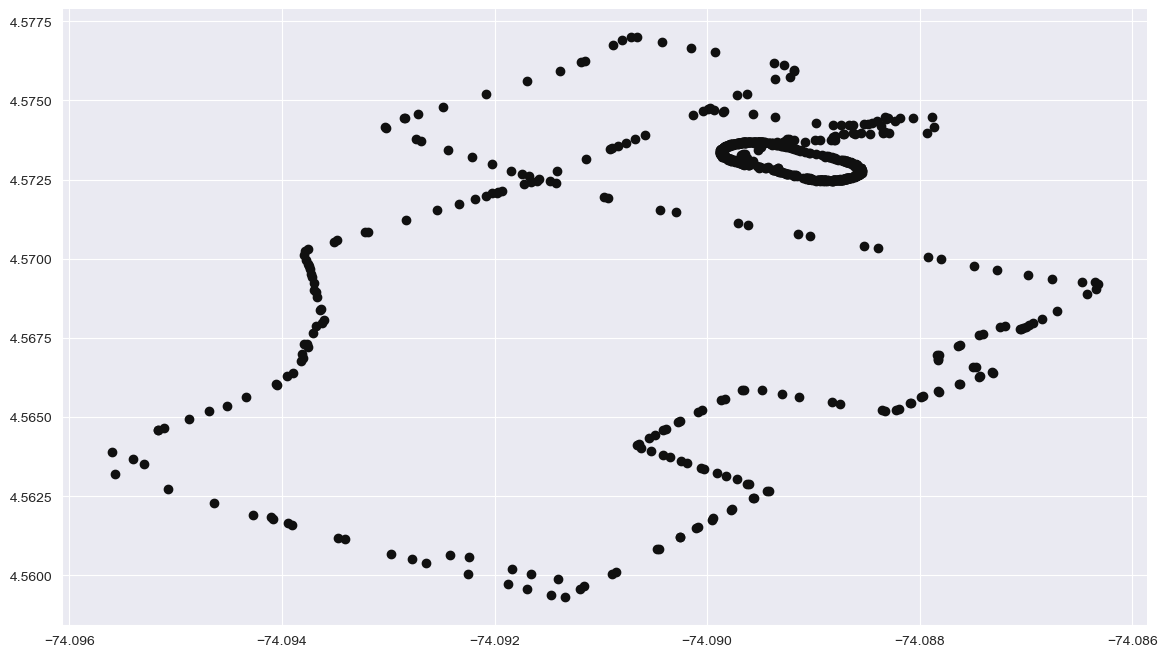

In [22]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')

In [24]:
route_map = folium.Map(
    location=[4.564597, -74.095165],
    zoom_start=13,
    tiles='Cartodb dark_matter',
    width=1024,
    height=600
)
display(route_map)

In [25]:
route_map = folium.Map(
    location=[4.564597, -74.095165],
    zoom_start=13,
    tiles='Cartodb dark_matter',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3
    ).add_to(route_map)

display(route_map)

In [26]:
route_map = folium.Map(
    location=[4.564597, -74.095165],
    zoom_start=13,
    tiles='Cartodb dark_matter',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [7]:
import folium
import branca.colormap as cm

route_map = folium.Map(
    location=[4.564597, -74.095165],
    zoom_start=13,
    tiles='Cartodb dark_matter',
    width=1024,
    height=600
)

coordinates = list(zip(route_df['latitude'], route_df['longitude']))
speeds = route_df['speed'].tolist()  # Assuming 'speed' is the column name

# Define a colormap based on speed
colormap = cm.linear.YlOrRd_09.scale(min(speeds), max(speeds))

# Add colored polyline segments to the map
for i in range(len(coordinates) - 1):
    coord1 = coordinates[i]
    coord2 = coordinates[i + 1]
    speed = speeds[i]
    color = colormap(speed)
    folium.PolyLine([coord1, coord2], color=color, weight=6).add_to(route_map)

# Add a color scale legend
colormap.add_to(route_map)

# Display the map
route_map


In [8]:
route_map.save("route_map.html")

In [40]:
folium.Map?

In [38]:
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
coordinates

[(4.564596712589264, -74.09516489133239),
 (4.564671227708459, -74.09510672092438),
 (4.56495470367372, -74.09487362019718),
 (4.565367009490728, -74.09451931715012),
 (4.56602331250906, -74.09405051730573),
 (4.5663942117244005, -74.09389251843095),
 (4.566769218072295, -74.09381808713078),
 (4.56687550060451, -74.09380425699055),
 (4.567206501960754, -74.09375622868538),
 (4.567313874140382, -74.09376259893179),
 (4.567660130560398, -74.09371088258922),
 (4.567968165501952, -74.09362555481493),
 (4.568058522418141, -74.09360527060926),
 (4.5684074610471725, -74.09363452345133),
 (4.568806774914265, -74.09367349930108),
 (4.569014981389046, -74.09369537606835),
 (4.569233078509569, -74.09370115958154),
 (4.569504568353295, -74.09372270107269),
 (4.569670362398028, -74.09373703412712),
 (4.569830372929573, -74.0937515348196),
 (4.570121308788657, -74.09379017539322),
 (4.570317193865776, -74.09375689923763),
 (4.570592874661088, -74.0934806317091),
 (4.5708460081368685, -74.09321651794

# Calculate Elevation Difference and Distance From Strava GPX Route

In [48]:
#%pip install haversine
import haversine as hs
import numpy as np

In [74]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)

In [75]:
haversine_distance(
    lat1=route_df.iloc[0]['latitude'],
    lon1=route_df.iloc[0]['longitude'],
    lat2=route_df.iloc[1]['latitude'],
    lon2=route_df.iloc[1]['longitude']
)

10.5

In [76]:
distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i - 1]['latitude'],
            lon1=route_df.iloc[i - 1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))

route_df['distance'] = distances
route_df.head()

,latitude,longitude,elevation,distance
0,4.564597,-74.095165,0.0,NaN
1,4.564671,-74.095107,0.0,10.50
2,4.564955,-74.094874,0.0,40.76
3,4.565367,-74.094519,0.0,60.37
4,4.566023,-74.094051,0.0,89.59


In [77]:
route_df['distance'].sum()

35081.72

In [78]:
route_df['elevation_diff'] = route_df['elevation'].diff()
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff
0,4.564597,-74.095165,0.0,NaN,NaN
1,4.564671,-74.095107,0.0,10.50,0.0
2,4.564955,-74.094874,0.0,40.76,0.0
3,4.565367,-74.094519,0.0,60.37,0.0
4,4.566023,-74.094051,0.0,89.59,0.0


In [79]:
route_df['cum_distance'] = route_df['distance'].cumsum()
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation
0,4.564597,-74.095165,0.0,NaN,NaN,NaN,NaN
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0


In [80]:
route_df[route_df['elevation_diff'] >= 0]['elevation_diff'].sum()

2975.399999999998

In [81]:
route_df['elevation_diff'].sum()

2718.4

In [82]:
route_df = route_df.fillna(0)
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation
0,4.564597,-74.095165,0.0,0.00,0.0,0.00,0.0
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0


In [92]:
route_df['elevation'].describe()

count     894.000000
mean     2626.370694
std       198.985774
min         0.000000
25%      2627.600000
50%      2630.600000
75%      2635.400000
max      2751.400000
Name: elevation, dtype: float64

# Visualize Route Elevation Profile

(2610.0, 2775.0)

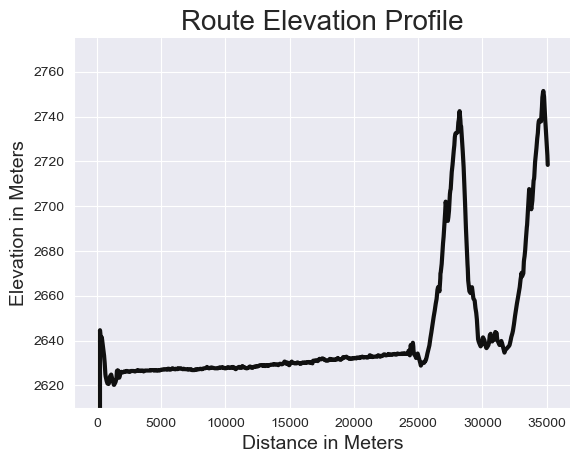

In [100]:
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route Elevation Profile', size=20)
plt.xlabel('Distance in Meters', size=14)
plt.ylabel('Elevation in Meters', size=14)
plt.ylim(2610, 2775)


# Calculate Gradients From a GPX Route File

In [107]:
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation
0,4.564597,-74.095165,0.0,0.00,0.0,0.00,0.0
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0


In [109]:
gradients = [np.nan]
for ind, row in route_df.iterrows():
    if ind == 0:
        continue
    grade = (row['elevation_diff'] / row['distance']) * 100
    if grade > 30:
        gradients.append(np.nan)
    else:
        gradients.append(np.round(grade, 1))
gradients[:10]

[nan, 0.0, 0.0, 0.0, 0.0, nan, -6.6, -5.0, -0.5, 3.3]

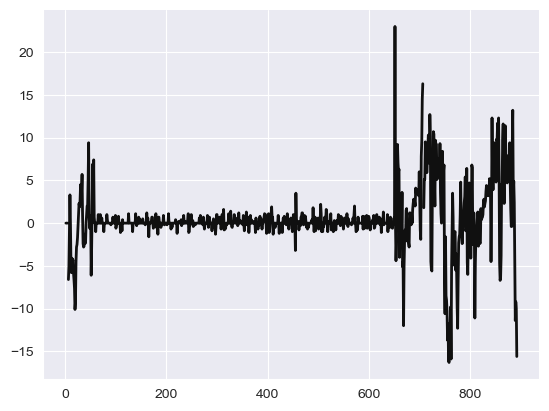

In [110]:
plt.plot(np.arange(len(gradients)), gradients, lw=2, color='#101010')

In [112]:
route_df['gradient'] = gradients
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation,gradient
0,4.564597,-74.095165,0.0,0.00,0.0,0.00,0.0,NaN
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0,0.0


# Fill missing values using interpolation

In [114]:
route_df['gradient'] = route_df['gradient'].interpolate().fillna(0)
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation,gradient
0,4.564597,-74.095165,0.0,0.00,0.0,0.00,0.0,0.0
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0,0.0


**gradient in cycling**: elevation difference between two points

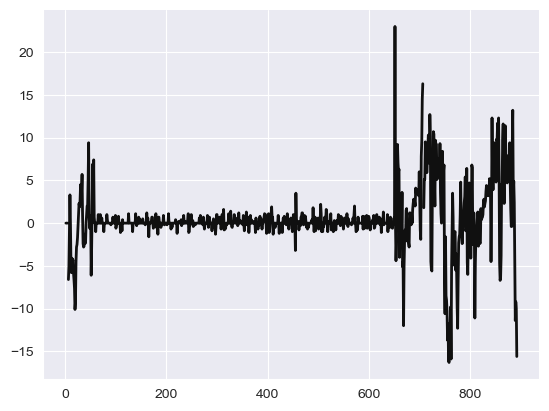

In [116]:
plt.plot(np.arange(len(route_df['gradient'])), gradients, lw=2, color='#101010')

# Visualize Gradient Ranges of a GPX Route

In [117]:
route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_distance,cum_elevation,gradient
0,4.564597,-74.095165,0.0,0.00,0.0,0.00,0.0,0.0
1,4.564671,-74.095107,0.0,10.50,0.0,10.50,0.0,0.0
2,4.564955,-74.094874,0.0,40.76,0.0,51.26,0.0,0.0
3,4.565367,-74.094519,0.0,60.37,0.0,111.63,0.0,0.0
4,4.566023,-74.094051,0.0,89.59,0.0,201.22,0.0,0.0


In [118]:
route_df['gradient'].describe()

count    894.000000
mean       0.423322
std        3.535907
min      -16.300000
25%        0.000000
50%        0.000000
75%        0.800000
max       23.000000
Name: gradient, dtype: float64

In [119]:
bins = pd.IntervalIndex.from_tuples([
    (-30, -10),
    (-10, -5),
    (-5, -3),
    (-3, -1),
    (-1, 0),
    (0, 1),
    (1, 3),
    (3, 5),
    (5, 7),
    (7, 10),
    (10, 12),
    (12, 15),
    (15, 20)
], closed='left')
bins

IntervalIndex([[-30, -10), [-10, -5), [-5, -3), [-3, -1), [-1, 0) ... [5, 7), [7, 10), [10, 12), [12, 15), [15, 20)], dtype='interval[int64, left]')

In [120]:
route_df['gradient_range'] = pd.cut(route_df['gradient'], bins=bins)


In [121]:
gradient_details = []

# For each unique gradient range
for gr_range in route_df['gradient_range'].unique():
    # Keep that subset only
    subset = route_df[route_df['gradient_range'] == gr_range]

    # Statistics
    total_distance = subset['distance'].sum()
    pct_of_total_ride = (subset['distance'].sum() / route_df['distance'].sum()) * 100
    elevation_gain = subset[subset['elevation_diff'] > 0]['elevation_diff'].sum()
    elevation_lost = subset[subset['elevation_diff'] < 0]['elevation_diff'].sum()

    # Save results
    gradient_details.append({
        'gradient_range': gr_range,
        'total_distance': np.round(total_distance, 2),
        'pct_of_total_ride': np.round(pct_of_total_ride, 2),
        'elevation_gain': np.round(elevation_gain, 2),
        'elevation_lost': np.round(np.abs(elevation_lost), 2)
    })

In [122]:
gradient_details_df = pd.DataFrame(gradient_details).sort_values(by='gradient_range').reset_index(drop=True)
gradient_details_df

,gradient_range,total_distance,pct_of_total_ride,elevation_gain,elevation_lost
0,"[-30.0, -10.0)",597.88,1.70,0.0,78.8
1,"[-10.0, -5.0)",1079.57,3.08,0.0,77.8
2,"[-5.0, -3.0)",808.30,2.30,2644.6,33.6
3,"[-3.0, -1.0)",2135.65,6.09,0.0,39.6
4,"[-1.0, 0.0)",6088.67,17.36,0.0,27.2
5,"[0.0, 1.0)",17336.00,49.42,29.2,0.0
6,"[1.0, 3.0)",2847.46,8.12,44.8,0.0
7,"[3.0, 5.0)",1913.12,5.45,74.0,0.0
8,"[5.0, 7.0)",954.62,2.72,55.4,0.0
9,"[7.0, 10.0)",967.41,2.76,85.6,0.0


In [123]:
colors = [
    '#0d46a0', '#2f3e9e', '#2195f2', '#4fc2f7',
    '#a5d6a7', '#66bb6a', '#fff59d', '#ffee58',
    '#ffca28', '#ffa000', '#ff6f00', '#f4511e', '#bf360c'
]

In [124]:
custom_text = [f'''<b>{gr}%</b> - {dst}km''' for gr, dst in zip(
    gradient_details_df['gradient_range'].astype('str'),
    gradient_details_df['total_distance'].apply(lambda x: round(x / 1000, 2))
)]
custom_text

['<b>[-30.0, -10.0)%</b> - 0.6km',
 '<b>[-10.0, -5.0)%</b> - 1.08km',
 '<b>[-5.0, -3.0)%</b> - 0.81km',
 '<b>[-3.0, -1.0)%</b> - 2.14km',
 '<b>[-1.0, 0.0)%</b> - 6.09km',
 '<b>[0.0, 1.0)%</b> - 17.34km',
 '<b>[1.0, 3.0)%</b> - 2.85km',
 '<b>[3.0, 5.0)%</b> - 1.91km',
 '<b>[5.0, 7.0)%</b> - 0.95km',
 '<b>[7.0, 10.0)%</b> - 0.97km',
 '<b>[10.0, 12.0)%</b> - 0.21km',
 '<b>[12.0, 15.0)%</b> - 0.14km',
 '<b>[15.0, 20.0)%</b> - 0.0km',
 '<b>nan%</b> - 0.0km']

In [125]:
fig = go.Figure(
    data=[go.Bar(
        x=gradient_details_df['gradient_range'].astype(str),
        y=gradient_details_df['total_distance'].apply(lambda x: round(x / 1000, 2)),
        marker_color=colors,
        text=custom_text
    )],
    layout=go.Layout(
        bargap=0,
        title='Gradient profile of a route',
        xaxis_title='Gradient range (%)',
        yaxis_title='Distance covered (km)',
        autosize=False,
        width=1440,
        height=800,
        template='simple_white'
    )
)
fig.show()